In [53]:
import math
import matplotlib.pyplot as plt
import random
from random import gauss
import numpy as np
import scipy
import seaborn as sns
import itertools
from google.colab import drive
import os
import csv

#mount your Google drive into this notebook
drive.mount('/content/gdrive')
#find the path to your Google drive root
os.getcwd()+"/gdrive/My Drive"
os.chdir('/content/gdrive/My Drive/Colab Notebooks/Data Mining/HW3')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [71]:


t = 160
tau = 0.85
b= -math.log(t, tau)
b=round(b)
print ("b is", b)

r =t/b
r= round(r)
print('r is', r)

 

b is 31
r is 5


In [126]:
b= 1
s= 0.85

for i in range (b,31):
  r = round(t/b)
  f = round(1-math.pow((1-math.pow(s,b)),r),3)
  print ('if b is', b,',r is',r, ',f(0.85) is',f)
  b += 1

if b is 1 ,r is 160 ,f(0.85) is 1.0
if b is 2 ,r is 80 ,f(0.85) is 1.0
if b is 3 ,r is 53 ,f(0.85) is 1.0
if b is 4 ,r is 40 ,f(0.85) is 1.0
if b is 5 ,r is 32 ,f(0.85) is 1.0
if b is 6 ,r is 27 ,f(0.85) is 1.0
if b is 7 ,r is 23 ,f(0.85) is 1.0
if b is 8 ,r is 20 ,f(0.85) is 0.998
if b is 9 ,r is 18 ,f(0.85) is 0.991
if b is 10 ,r is 16 ,f(0.85) is 0.97
if b is 11 ,r is 15 ,f(0.85) is 0.936
if b is 12 ,r is 13 ,f(0.85) is 0.864
if b is 13 ,r is 12 ,f(0.85) is 0.787
if b is 14 ,r is 11 ,f(0.85) is 0.697
if b is 15 ,r is 11 ,f(0.85) is 0.634
if b is 16 ,r is 10 ,f(0.85) is 0.538
if b is 17 ,r is 9 ,f(0.85) is 0.444
if b is 18 ,r is 9 ,f(0.85) is 0.391
if b is 19 ,r is 8 ,f(0.85) is 0.312
if b is 20 ,r is 8 ,f(0.85) is 0.271
if b is 21 ,r is 8 ,f(0.85) is 0.235
if b is 22 ,r is 7 ,f(0.85) is 0.18
if b is 23 ,r is 7 ,f(0.85) is 0.155
if b is 24 ,r is 7 ,f(0.85) is 0.133
if b is 25 ,r is 6 ,f(0.85) is 0.099
if b is 26 ,r is 6 ,f(0.85) is 0.085
if b is 27 ,r is 6 ,f(0.85) is 0.072
if b is 2

In [0]:
def plot_f(b,r):
  s_values =[]
  f_values =[]
  for n in range (1,10):
    s = round(n*0.1+0.05,2)
    s_values.append(s)
    f = round(1-math.pow((1-math.pow(s,b)),r),3)
    f_values.append(f)
    #print ('s is', s, 'f is',f)

  #plt.title("f with b(# hashes in a band) = %d  and r(# rows of bands)= %d" %(b ,r))
  plt.xlabel("s = JS")  
  plt.ylabel("f(s) - probability all hashes colide in at leawt 1 band") 
  plt.plot(s_values,f_values)
  return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

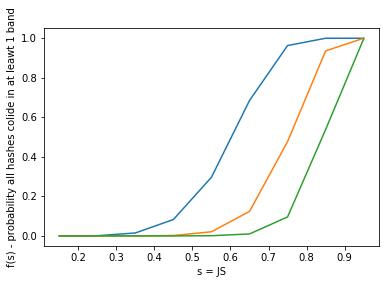

In [125]:
plot_f(7,23)
plot_f(11,15)
plot_f(16,10)

In [161]:
b=11
r=15
all_s = [0.77,0.25,0.33,0.20,0.55,0.91]
for s in all_s:
  f = round(1-math.pow((1-math.pow(s,b)),r),3)
  print(f)

0.581
0.0
0.0
0.0
0.021
0.999


In [0]:
def make_rand_vector(dims):
    vec = [gauss(0, 1) for i in range(dims)]
    mag = sum(x**2 for x in vec) ** .5
    return [x/mag for x in vec]

In [0]:
v = np.random.rand(10)
u = v/np.linalg.norm(v)

print(u)
np.linalg.norm(u)

In [0]:
r= random.sample(range(10), 3)
print(r)
a=list(itertools.combinations(r, 2))
print(a)
a=np.array(a)
print(a)
print(a.T)
#print (x.dot(y) for x,y in itertools.combinations(r, 2))

In [0]:
t=[]
for i in range(3):
  r= random.sample(range(10),3)
  t.append(r)
print(t)
a=list(itertools.combinations(t, 2))
print(a)
print (len(a))
#print(a[0])
#print(np.dot(a[0][0],a[0][0+1]))

dot_pr = []
for i in range(len(a)):
  print(a[i])
  d=np.dot(a[i][0],a[i][1])
  print(d)
  dot_pr.append(d)
print(dot_pr)  

In [0]:
#generate single random unit vector
#n is number of dimension
def rand_unit_vector(n):
  u1 = np.random.random(n)
  u2 = np.random.random(n)
  r_squared = -2*np.log(u1)
  r = np.sqrt(r_squared)
  theta = 2*np.pi*u2
  g = r*np.cos(theta)
  g = g/np.linalg.norm(g)
  return g

In [0]:
def plot_cdf(prod_vecs):
    num_bins = 100
    counts, bin_edges = np.histogram (prod_vecs, bins=num_bins)
    cdf = np.cumsum (counts)
    plt.plot (bin_edges[1:], cdf/cdf[-1])
    return plt    

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

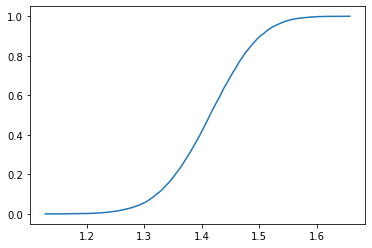

In [195]:
#generate random unit vectors and calculate its pairwise dot product
t = 160 # number of vecctors
n = 100 # number of dimension
vectors =[]
for i in range(t):
  vectors.append(rand_unit_vector(n)) 
y= scipy.spatial.distance.pdist(vectors, 'euclidean')

#plot CDF
plot_cdf(y)

In [0]:
y_sorted = np.sort(y)
p = 1. * np.arange(len(y)) / (len(y) - 1)
plt.plot(y_sorted, p)


In [0]:
def dotproduct(v1, v2):
  return sum((a*b) for a, b in zip(v1, v2))

def length(v):
  return math.sqrt(dotproduct(v, v))

def angle(v1, v2):
  return 1-(math.acos(dotproduct(v1, v2) / (length(v1) * length(v2)))/np.pi)

In [0]:
def cos_similarity(v1,v2): 
  v1_norm = np.sqrt(np.dot(v1,v1))
  v2_norm = np.sqrt(np.dot(v2,v2))
  v1_unit= v1/v1_norm
  v2_unit = v2/v2_norm
  #print(np.linalg.norm(v2))
  return 1-(np.arccos(np.dot(v1_unit,v2_unit))/np.pi)

Total number of combination is 124750
The number of pairs that has tau > 0.85 is 39283


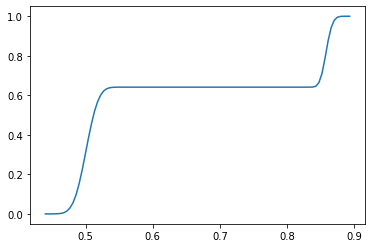

In [206]:
with open('R.csv', newline='') as csvfile:
    data = list(csv.reader(csvfile))
    data=[[float(y) for y in x] for x in data]
    pair_list=list(itertools.combinations(data, 2))
    print('Total number of combination is', len(pair_list))
    s_ang=[]
    count_tau = 0
    for i in range(len(pair_list)):
      s_ang.append(cos_similarity(pair_list[i][0], pair_list[i][1]))
      if cos_similarity(pair_list[i][0], pair_list[i][1]) > 0.85:
        count_tau += 1 
    print('The number of pairs that has tau > 0.85 is %d'%count_tau)
    plot_cdf(s_ang)

In [0]:
#generate random unit vectors
t = 160 # number of vecctors
n = 100 # number of dimension
vectors =[]
for i in range(t):
  vectors.append(rand_unit_vector(n))

#create list of pairwise combination   
pair_list=list(itertools.combinations(vectors, 2))
print('Total number of combination is', len(pair_list))

s_ang=[]
count_tau = 0
for i in range(len(pair_list)):
  #calculate the pairwise cosine similarity
  s_ang.append(cos_similarity(pair_list[i][0], pair_list[i][1]))
  #count if tau for the pairwise similarity is >0.85
  if cos_similarity(pair_list[i][0], pair_list[i][1]) > 0.85:
    count_tau += 1 
print('The number of pairs that has tau > 0.85 is %d'%count_tau)

#plot CDF
plot_cdf(s_ang)  